In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
btc = pd.read_csv('btc_prediction_datawranglingStage.csv')

In [3]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49150 entries, 0 to 49149
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              49150 non-null  object 
 1   open              49150 non-null  float64
 2   high              49150 non-null  float64
 3   low               49150 non-null  float64
 4   close             49150 non-null  float64
 5   quoteAssetVolume  49150 non-null  float64
 6   TBQuoteVolume     49150 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.6+ MB


In [4]:
target = btc['close'].values

In [5]:
btc_features = btc.drop('Date', axis=1)

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
btc_scaled = scaler.fit_transform(btc_features)

In [7]:
btc_scaled_df = pd.DataFrame(btc_scaled, columns=btc_features.columns)
btc_scaled_df['Date'] = btc['Date']
btc_scaled_df.set_index('Date', inplace=True)
print(btc_scaled_df.head())

                             open      high       low     close  \
Date                                                              
2017-08-17 04:59:59.999  0.021145  0.020645  0.022006  0.021149   
2017-08-17 05:59:59.999  0.021865  0.020873  0.022463  0.021248   
2017-08-17 06:59:59.999  0.022191  0.021127  0.022738  0.021386   
2017-08-17 07:59:59.999  0.021983  0.021196  0.022403  0.021776   
2017-08-17 08:59:59.999  0.022237  0.021618  0.023103  0.021939   

                         quoteAssetVolume  TBQuoteVolume  
Date                                                      
2017-08-17 04:59:59.999          0.000067       0.000100  
2017-08-17 05:59:59.999          0.000033       0.000062  
2017-08-17 06:59:59.999          0.000010       0.000014  
2017-08-17 07:59:59.999          0.000006       0.000008  
2017-08-17 08:59:59.999          0.000001       0.000002  


In [8]:
X_train, X_test, y_train, y_test = train_test_split(btc_scaled_df, target, test_size=0.2, random_state=42)

In [9]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [10]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

MSE: 16.52
R-squared: 1.00


In [12]:
print(y_test[idx])
print(y_test_sorted)
print(y_pred_sorted)


[ 3172.05  3214.    3217.98 ... 68068.24 68382.69 68524.69]
[ 3172.05  3214.    3217.98 ... 68068.24 68382.69 68524.69]
[ 3184.368  3215.685  3215.872 ... 68020.323 68384.494 68465.806]


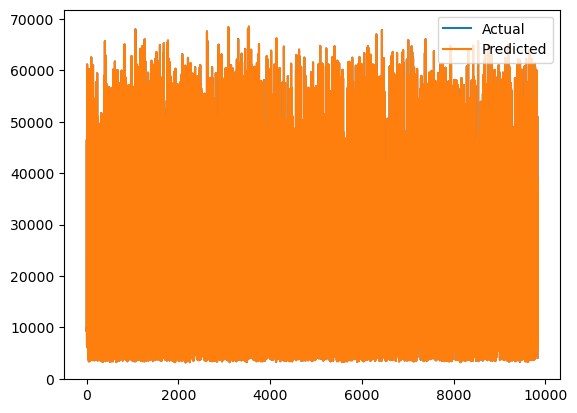

In [13]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()